<a href="https://colab.research.google.com/github/jscastanos/veggies-cnn/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, Dense,Flatten, MaxPooling2D,Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import pandas as pd

# Load Data

In [ ]:
# this is my personal npz created from 100 images, 20 images each class
# check my repo for more info https://github.com/jscastanos/veggies
%%capture
!wget https://github.com/jscastanos/veggies/raw/main/veggies-dataset.npz -O veggies-dataset.npz

path = '/content/veggies-dataset.npz'

In [ ]:
with np.load(path, allow_pickle=True) as data:
  X_data = data['X_train']
  y_data = data['y_train']

In [ ]:
# somehow np array is lost
# hack it for now
X_data = np.array([np.array(val) for val in X_data])
y_data = np.array([np.array(val) for val in y_data])

# Split Training and Test Data

In [ ]:
# split train and test 70-30
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.30)

# Show Data 

Training Set



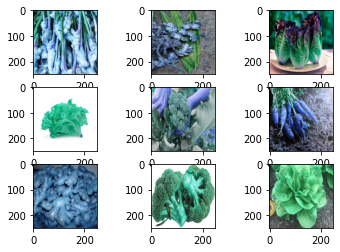

[0 0 1 1 4 2 0 4 1]
Testing Set



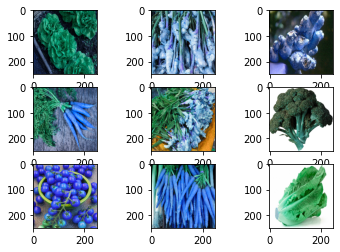

[1 0 0 2 0 4 3 2 1]


In [ ]:
print("Training Set\n")
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))

plt.show()
print(y_train[0:9])

print("Testing Set\n")
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(X_test[i])

plt.show()
print(y_test[0:9])

# Show Classification

In [ ]:
# download file
%%capture
!wget https://github.com/jscastanos/veggies/raw/main/veggies-category.csv -O veggies-category.csv

path = '/content/veggies-category.csv'


In [ ]:
df = pd.read_csv(path)
df

,category
0,Ginger
1,Lettuce
2,Carrot
3,Tomato
4,Broccoli


In [ ]:
# store categories to array
categories = df['category']

# Normalize Data

In [ ]:
X_train, X_test = X_train/255.0 , X_test/255.0

# Convolutional Neural Network

In [ ]:

model = Sequential()

model.add(Conv2D(100, (3, 3), input_shape=(250, 250, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(50, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(50, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(5))
model.add(Activation('softmax'))

model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(from_logits=False),
              metrics=[SparseCategoricalAccuracy()])

model.fit(X_train, y_train, batch_size=20, epochs=5)

Epoch 1/5
4/4 [==============================] - 28s 4s/step - loss: 2.2350 - sparse_categorical_accuracy: 0.2286
Epoch 2/5
4/4 [==============================] - 17s 4s/step - loss: 1.5265 - sparse_categorical_accuracy: 0.3571
Epoch 3/5
4/4 [==============================] - 17s 4s/step - loss: 1.3655 - sparse_categorical_accuracy: 0.4429
Epoch 4/5
4/4 [==============================] - 17s 4s/step - loss: 1.0918 - sparse_categorical_accuracy: 0.5429
Epoch 5/5
4/4 [==============================] - 17s 4s/step - loss: 0.7377 - sparse_categorical_accuracy: 0.7714


# Accuracy

The accuracy of this model is more than **70%**, we can increase this by training more sample data to our model.

# Predictions

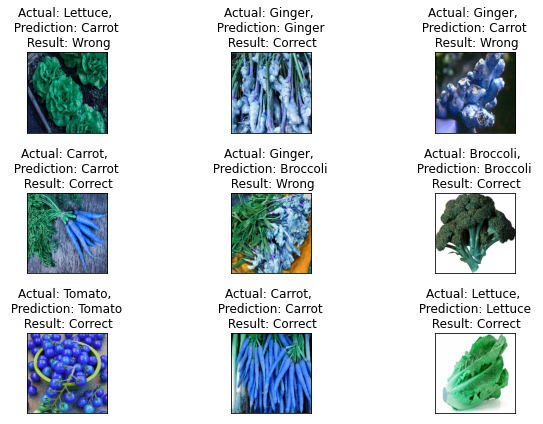

In [ ]:
# loop through first 10 X_test
predictions = model([X_test[:9]]).numpy()

predictedClasses = np.array([np.argmax(pred) for pred in predictions])


fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

counter = 0

for ax, predicted in zip(axs.flat, predictedClasses):
  actual = y_test[counter]
  ax.imshow(X_test[counter])

  title = f'Actual: {categories[actual]}, \n Prediction: {categories[predicted]}'

  if actual == predicted:
     ax.set_title(f'{title} \n Result: Correct')
  else:
     ax.set_title(f'{title} \n Result: Wrong')
  counter += 1

plt.tight_layout()
plt.show()




